In [29]:
import numpy as np
from package.Graphs import Graphs
import matplotlib.pyplot as plt

In [30]:
state0 = np.load('../Data/neel_readout/qutrit/051024/Q1_state0_1µs.npy')
state1 = np.load('../Data/neel_readout/qutrit/051024/Q1_state1_1µs.npy')
state2 = np.load('../Data/neel_readout/qutrit/051024/Q1_state2_1µs.npy')

state0.shape

(1000, 8192)

In [31]:
frequencies=6558994494.03787
samples_per_clk=16
st = 20272 #Vary from circuit to circuit
CSTROBE_DELAY=2
QCLK_DELAY=4
PHASEIN_DELAY=1
phase=3.4
CLK_CYCLE=2
PHASE_RST_DELAY=9
start_time = samples_per_clk*st + samples_per_clk*(CSTROBE_DELAY + QCLK_DELAY + PHASEIN_DELAY)
phases = phase + 2*np.pi*(CLK_CYCLE/samples_per_clk)\
        *1.e-9*(start_time - samples_per_clk*(PHASE_RST_DELAY))*frequencies
amplitude=1 #1/1.64676025812107
dlo=Graphs.getComplexSignal(frequencies,amplitude,st=0,end=4096,step=0.5,phase=phases,t0=0) #(8192)
dlo_int=np.ceil(dlo.real*((2**15)-1)) + 1j*(np.ceil(dlo.imag*((2**15)-1)))
# print(dlo_int)

#Mixing og signal and convert the into complex signals
state0=((state0+0j)*dlo_int) #(1000,8192)
state1=((state1+0j)*dlo_int)
state2=((state2+0j)*dlo_int)

## MultiRead

In [23]:
state0 = np.array([state0[:,700:2700], state0[:, 2900:4900], state0[:, 5100:7100]])
state1 = np.array([state1[:,700:2700], state1[:, 3020:5020], state1[:, 5220:7220]])
state2 = np.array([state2[:,700:2700], state2[:, 3140:5140], state2[:, 5340:7340]])
state0=np.sum(state0,axis=-1)
state1=np.sum(state1,axis=-1)
state2=np.sum(state2,axis=-1)

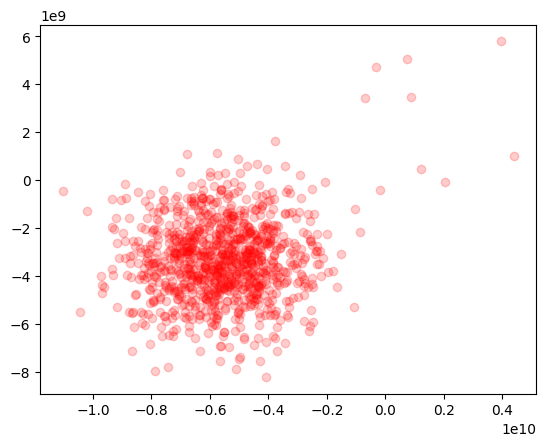

In [33]:
plt.scatter(state0[0,:].real,state0[0,:].imag, alpha=0.2)
plt.scatter(state1[0,:].real,state1[0,:].imag, alpha=0.2, color='red')
plt.scatter(state2[0,:].real,state2[0,:].imag, alpha=0.2)
plt.show()

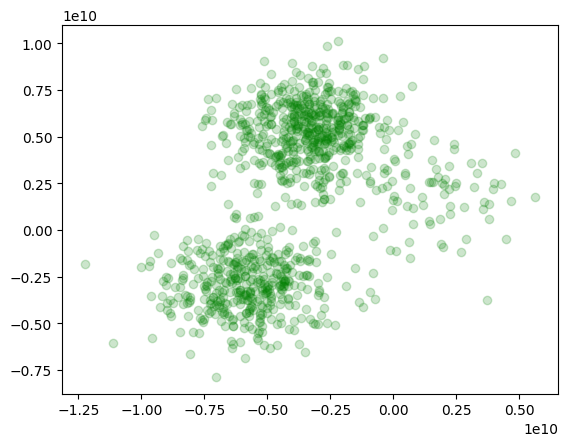

In [57]:
plt.scatter(state0[1,:].real,state0[1,:].imag, alpha=0.2)
plt.scatter(state1[1,:].real,state1[1,:].imag, alpha=0.2, color='red')
plt.scatter(state2[1,:].real,state2[1,:].imag, alpha=0.2, color='green')
plt.show()

In [58]:
mean0 = state0[0,].mean()
mean1 = state1[1,].mean()+ [3e9 + 1j*2e9]
mean2 = state2[1,].mean()+ [1e9 + 1j*3e9]
count,count1=0,0
for i in state2[1]:
    if np.linalg.norm(mean2-i) < np.linalg.norm(mean0-i):
        count1+=1
    count+=1
print(count,count1)

1000 589


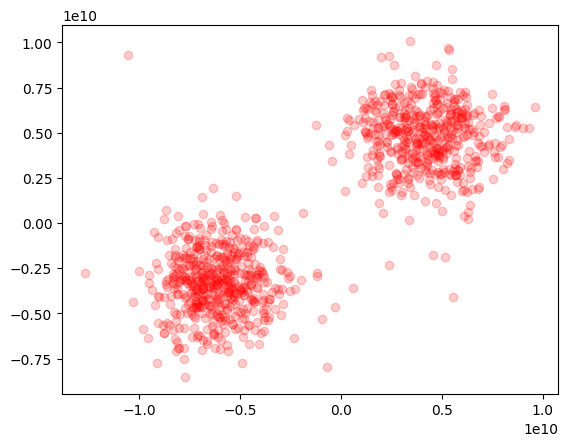

In [35]:
plt.scatter(state0[2,:].real,state0[2,:].imag, alpha=0.2)
plt.scatter(state1[2,:].real,state1[2,:].imag, alpha=0.2, color='red')
plt.scatter(state2[2,:].real,state2[2,:].imag, alpha=0.2)

## Single Read

### Accum

In [27]:
state0 = np.sum(state0[:,700:2700],axis=-1)
state1 = np.sum(state1[:,700:2700],axis=-1)
state2 = np.sum(state2[:,700:2700],axis=-1)

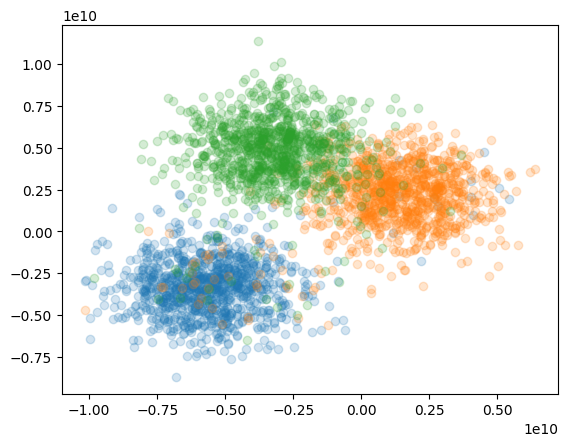

In [28]:
plt.scatter(state0.real,state0.imag, alpha=0.2)
plt.scatter(state1.real,state1.imag, alpha=0.2)
plt.scatter(state2.real,state2.imag, alpha=0.2)

### Pathsig

In [32]:
argumentation_list = ["basepoint", "addtime"]
rescaling = "pre"
depth = 3
sig0 = Graphs.numpy_signature_evaluation(np.stack((state0[:,700:2700].real , state0[:,700:2700].imag),axis=1)
                                         ,argumentation_list
                                         ,rescaling
                                         ,depth)
sig1 = Graphs.numpy_signature_evaluation(np.stack((state1[:,700:2700].real , state1[:,700:2700].imag),axis=1)
                                         ,argumentation_list
                                         ,rescaling
                                         ,depth)
sig2 = Graphs.numpy_signature_evaluation(np.stack((state2[:,700:2700].real , state2[:,700:2700].imag),axis=1)
                                         ,argumentation_list
                                         ,rescaling
                                         ,depth)